<div> 
    
<h1 align="center"> GBM8378 - Principes d'imagerie biomédicale </h1>
<h2 align="center"> Laboratoire 1 - Computed Tomography (Tomodensitométrie)</h2>
<br>
    
<b>
Prénom1 Nom1 - Matricule1<br>
Prénom2 Nom2 - Matricule2
</b>
    
</div> 

<div align="center" class="alert alert-block alert-danger">
    <b>Assurez vous d'avoir indiqué vos noms et matricules dans la cellule précédente.</b>
</div>

<div class="alert alert-block alert-danger">
<b>
Avant de commencer à répondre au différentes questions, veuillez vérifier que le Jupyter Notebook fonctionne correctement:
    <br>
    <br>
    1. Redémarrez le noyau (dans la barre de menu : "Kernel" $\rightarrow$ "Restart")
    <br>
    2. Lancez toutes les cellules (dans la barre de menu :  "Cell" $\rightarrow$ "Run All").
</b>
</div>



<div class="alert alert-block alert-info">
    
<h1 align="center"> Travail à effectuer </h1> 
    
<b><u>Le PDF contenant la partie théorique du TP est disponible sur Moodle.</u>
<br><br>
    
Avant de remettre votre travail, assurez-vous d'avoir rempli toutes les sections `"Commencez votre code ici"` et `"Double-cliquez pour entrez votre réponse"`.</b>
</div>

<h1> <font color='teal'> Section 1 - Questions préliminaires (5pts) </font></h1>

<div class="alert alert-warning"><b>1.1. Quel est l’unité de μ, le coefficient d’atténuation des rayons X?</b></div>

<div class="alert alert-block alert-success"> <b> Par définition, le coefficient d'atténuation représente le nombre de photons absorbés par mètre. Ainsi, les unités sont les $m^{-1}$. </b> </div>

<div class="alert alert-warning"><b>1.2. L’équation (1) de la partie théorique fait l’hypothèse d’une source de photons monochromatique. Peut-on considérer que chaque photon conserve la même énergie tout au long de sa propagation dans l’objet ? Justifier.</b></div>

<div class="alert alert-block alert-success"> <b> Non. En effet, l'effet Compton change le niveau énergétique des photons déviés. Ainsi, les photons ne conservent pas la même énergie, malgré le fait que la source soit monochromatique.</b> </div>

<div class="alert alert-warning"><b>1.3. En pratique les sources à rayons X ne sont pas monochromatiques. Pourquoi ?</b></div>

<div class="alert alert-block alert-success"> <b> Étant donné que le phénomène régissant la source à rayons X est le rayonnement de Bremsstrahlung et que ce phénomène produit un large spectre de fréquences, alors la source est polychromatique.</b> </div>

<div class="alert alert-warning"><b>1.4. On considère ici que les rayons X se propagent en ligne droite dans l’objet à imager. Comment peut-on limiter la détection de rayons-x issus de la diffusion de Compton pour que cette hypothèse soit vraie ?</b></div>

<div class="alert alert-block alert-success"> <b> En utilisant un collimateur au détecteur, nous pouvons nous assurer que les rayons détectés se dirige davantage en ligne droite à partir de la source.</b> </div>

<div class="alert alert-warning">
<b>
1.5. À partir de la figure 4 de la partie théorique, décrivez qualitativement à quoi ressemblerait la tranformée de Fourier F(u,v) de l'image  f(x,y) dans le cas suivant :
</b>
    
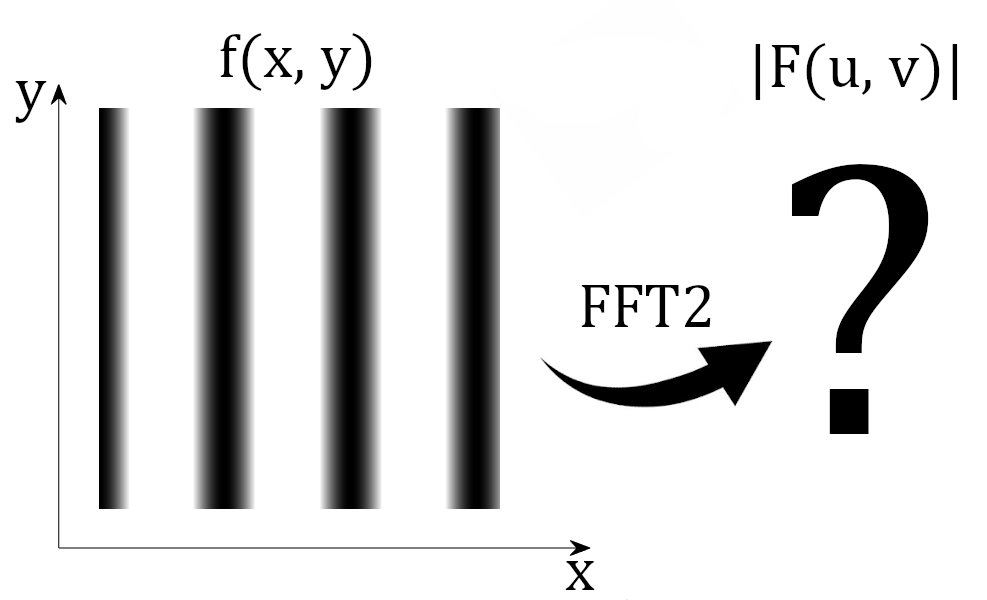

</div>

<div class="alert alert-block alert-success"> <b> Le spectre d'amplitude F(u,v) serait constituée de deux points (Dirac) à distances égales de l'origine, situés sur une la ligne centrale horizontale. Étant donné que le signal f(x,y) est de basse fréquence, alors ces deux points seront relativement proches de l'origine. </b> </div>

<h1><font color='teal'> Section 2 - Projection et rétroprojection (2pts) </font></h1>

<div class="alert alert-block alert-info">
<b>Simuler la projection d’une image fantôme et calculer sa rétroprojection.</b> <br>
<i>sino_ES_S</i> contient le sinogramme. Celui-ci a été réalisé à partir de 180 projections acquises pour θ = [0 179]°.
</div>

In [1]:
# Dans cette cellule, nous importons les librairies/fonctions qui vous serons utiles pour compléter le laboratoire.

# Librairies
import numpy as np
import matplotlib.pyplot as plt
import skimage.data

# Fonctions
from scipy.ndimage import convolve
from scipy.ndimage.interpolation import rotate
from numpy.fft import fft, fft2, ifft, fftshift, ifftshift
from skimage.transform import radon, iradon

%matplotlib inline

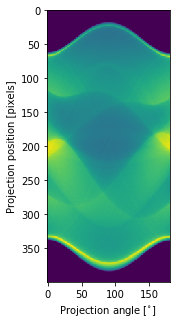

In [2]:
# Créer le sinogramme à partir du fantôme de Shepp-Logan de skimage.data
sino_ES_S = radon(skimage.data.shepp_logan_phantom())  # ES_S = espace spatial shifté

# Afficher le sinogramme
plt.figure(figsize=[5, 5])
plt.imshow(sino_ES_S)
plt.xlabel('Projection angle [$^{\circ}$]')
plt.ylabel('Projection position [pixels]');

<div class="alert alert-warning">
    <b>2.1. Effectuer la rétroprojection du sinogramme à l’aide de la fonction <a href="https://www.kite.com/python/docs/skimage.transform.iradon">skimage.transform.iradon</a> précédemment importée. (1pt)</b><br>
Attention, vous ne devez pas effectuer de filtrage lors de la rétroprojection. Pour cela, référez-vous à la documentation de la fonction iradon.
</div>
<div class="alert alert-info">
<b>L'animation ci-dessous, produite par l'Ecole Polytechnique Fédérale de Lausanne, montre comment la rétroprojection est obtenue à partir du sinogramme:</b>
<img SRC="retroprojection.gif">
    
  - Chaque projection contenue dans le sinogramme est étirée sur la largeur de l'image désirée.
  - Toutes ces projections sont ajoutées les unes aux autres en les rotatant aux angles auxquels elles ont été respectivement acquises.</div>

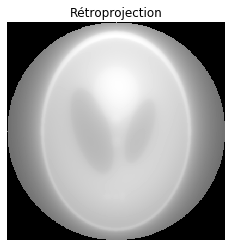

In [10]:
angles = range(180)

# Calculez et affichez la rétroprojection (4 lignes maximum).
retroprojection = skimage.transform.iradon(sino_ES_S, theta = angles, filter_name = None)
plt.imshow(retroprojection, cmap = 'gray');
plt.title("Rétroprojection");
plt.gca().set_axis_off();

<div class="alert alert-warning">
    <b>2.2. Pourquoi le sinogramme a-t-il été acquis sur 180$^{\circ}$ plutôt que sur 360$^{\circ}$ ? (1pt)</b>
</div>

<div class="alert alert-block alert-success"> <b> Étant donné que les projections opposées (différences de 180 degrés) sont redondantes. </b> </div>

<h1><font color='teal'> Section 3 - Rétroprojection filtrée (5pts) </font></h1>

<div class="alert alert-block alert-info">
    L'objet que vous devriez visualiser est un <a href="https://en.wikipedia.org/wiki/Shepp%E2%80%93Logan_phantom">fantôme de Shepp-Logan</a>. Il s'agit d'une image fréquemment utilisée pour simuler une tête humaine lors du développement d'algorithmes de reconstruction d'images médicales.<br>
Vous pouvez constater que le centre de l'image est très intense et produit un effet "d'éblouissement". Ce phénomène est lié au processus de rétroprojection et nous allons maintenant voir comment il peut être compensé afin d'obtenir une image plus homogène et fidèle à la réalité. Pour cela, nous allons filtrer notre signal à l'aide d'une rampe.
</div>

<div class="alert alert-warning">
<b> 3.1. Par quelle opération mathématique peut-on appliquer le filtre rampe |ω| dans le domaine fréquentiel ? (1pt) </b>
</div>

<div class="alert alert-block alert-success"> <b> Dans le domaine fréquentiel, le filtre rampe est appliqué par une multiplication. </b> </div>

<div class="alert alert-warning">
<b> 3.2. Quel est l'équivalent de cette opération dans le domaine image (spatial) ? (1pt)</b>
</div>

<div class="alert alert-block alert-success"> <b> L'équivalent de la multiplication entre deux fonctions dans le domaine image est la convolution. </b> </div>

<div class="alert alert-warning">
<b>
3.3. Appliquez les filtres suivants à votre sinogramme et comparez les reconstructions obtenues:
    
- aucun filtre<br>
- un filtre |ω| dans le domaine fréquentiel shifté<br>
- un filtre |ω| dans le domaine fréquentiel non-shifté<br>
- un filtre |ω| dans le domaine spatial shifté<br>

Ci-dessous, le filtre |ω| vous est présenté dans chacun des espaces d'intêret. Sélectionnez le.s filtres appropriés pour vos calculs et affichez les rétroprojections filtrées ainsi obtenues. (2pt)</b><br>
</div>

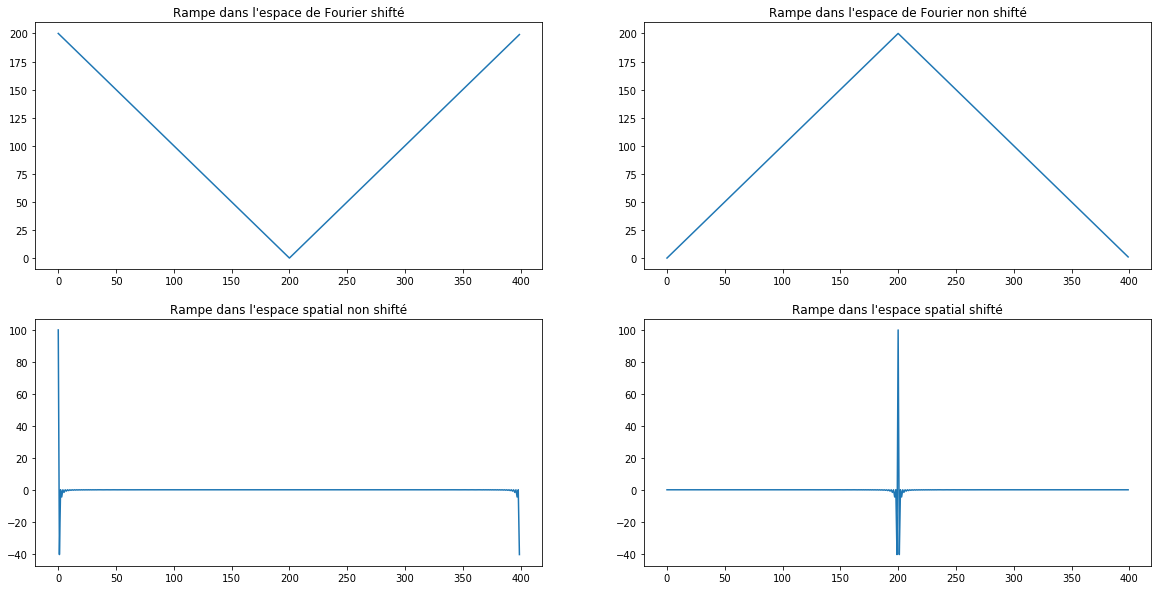

In [27]:
# Construction et affichage des filtres que vous pourrez utiliser:

nb_pixels = sino_ES_S.shape[0] ; nb_angles = sino_ES_S.shape[1]
# Rampe dans l'espace de Fourier shifté (en 1D, basses fréquences au centre):
ramp_EF_S = np.asarray([abs(nb_pixels / 2 - i) for i in range(nb_pixels)]).T
# Rampe dans l'espace de Fourier non shifté (en 1D, basses fréquences sur les bords):
ramp_EF_NS = ifftshift(ramp_EF_S)
# Rampe dans l'espace spatial non shifté:
ramp_ES_NS = np.real(ifft(ramp_EF_NS))
# Rampe dans l'espace spatial shifté:
ramp_ES_S = fftshift(ramp_ES_NS)

plt.figure(figsize=[20, 10])
plt.subplot(2, 2, 1)
plt.plot(ramp_EF_S)
plt.title('Rampe dans l\'espace de Fourier shifté')
plt.subplot(2, 2, 2)
plt.plot(ramp_EF_NS)
plt.title('Rampe dans l\'espace de Fourier non shifté')
plt.subplot(2, 2, 3)
plt.plot(ramp_ES_NS)
plt.title('Rampe dans l\'espace spatial non shifté')
plt.subplot(2, 2, 4)
plt.plot(ramp_ES_S)
plt.title('Rampe dans l\'espace spatial shifté');

<div class="alert alert-block alert-info">
    
<h2 align="center">Différents espaces relatifs aux transformées de Fourier</h2>
   
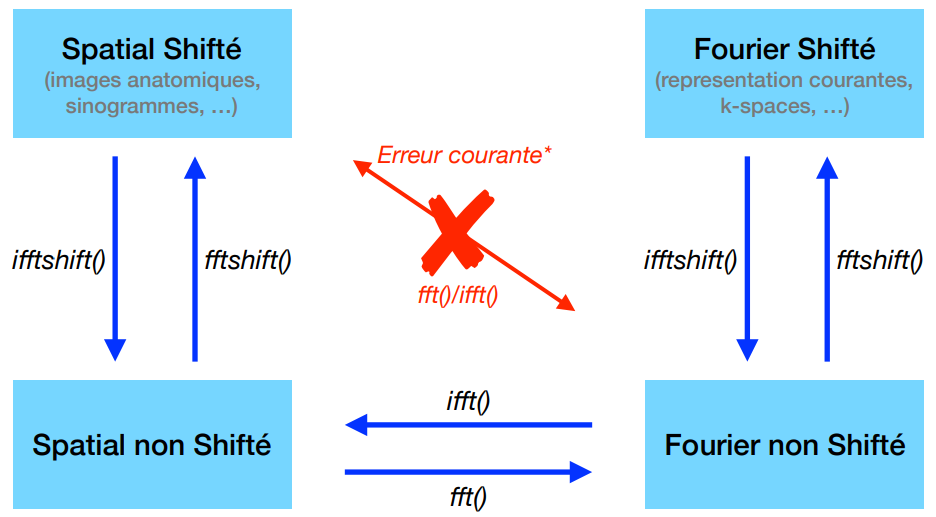

<b>Les rappels suivant vous aideront à manipuler vos données entre les domaines spatiaux et fréquentiels:
<br>    
* Passer directement de l’espace Spatial shifté à l’espace de Fourier non shifté ne conserve pas la symétrie et l’aspect réél pur des fonctions. 
* Cette erreur est généralement mineure lorsque l'on affiche la valeur absolue du résultat. Cependant, des erreurs visibles arrivent lorsqu’on fait des opérations sur des résultats erronés, par exemple des filtrages. 
* Pour éviter toute erreur, il faut simplement faire nos opérations mathématiques avec des objects (matrices, vecteurs..) qui sont dans le même espace.</b>
</div>

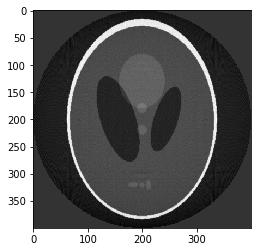

In [35]:
sino_filtre_EF_NS = np.array([fft(column) * ramp_EF_NS for column in sino_ES_S.T]).T
sino_filtre_ES_NS = np.array([ifft(column) for column in sino_filtre_EF_NS.T]).T
retro_EF_NS = skimage.transform.iradon(sino_filtre_ES_NS, theta = angles, filter_name = None)
plt.imshow(retro_EF_NS, cmap="gray");

In [16]:
# ==== Filtrage dans l'Espace Fourier shifté (4 lignes max) ====>

sino_filtre_EF_S = np.array([fft(column) * ramp_EF_S for column in sino_ES_S.T]).T
sino_filtre_ES_S = np.array([ifft(column) for column in sino_filtre_EF_S.T]).T
retro_EF_S = skimage.transform.iradon(sino_filtre_ES_S, theta = angles, filter_name = None)

# ==== Filtrage dans l'Espace Fourier non shifté (4 lignes max) ====>

sino_filtre_EF_NS = np.array([fft(column) * ramp_EF_NS for column in sino_ES_S.T]).T
sino_filtre_ES_NS = np.array([ifft(column) for column in sino_filtre_EF_NS.T]).T
retro_EF_NS = skimage.transform.iradon(sino_filtre_ES_NS, theta = angles, filter_name = None)

# ==== Filtrage dans l'Espace Spatial shifté (4 lignes max) ====>

# >>>>> Commencez votre code ici <<<<<

#retro_ES_S =

# Affichage des images reconstruites:
plt.figure(figsize=[15, 15])
plt.subplot(221); plt.imshow(iradon(sino_ES_S,angles,filter_name=None)); plt.title('Rétroprojection non filtrée')
plt.subplot(222); plt.imshow(retro_EF_S); plt.title('Filtre appliqué dans l\'espace de Fourier shifté')
plt.subplot(223); plt.imshow(retro_EF_NS); plt.title('Filtre appliqué dans l\'espace de Fourier non-shifté')
plt.subplot(224); plt.imshow(retro_ES_S); plt.title('Filtre appliqué dans l\'espace spatial shifté');

NameError: name 'nsino_ES_S' is not defined

<div class="alert alert-warning">
<b>
3.4. Expliquer l'intérêt du filtre |ω| dans le cadre d'une rétroprojection par rapport à d'autres types de filtre. L'espace d'application du filtre (spatial ou fréquentiel) a-t-il un effet sur les images filtrées? (1pt)</b>
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse. </b> </div>

<h1><font color='teal'> Section 4 - Performance de la rétroprojection filtrée (2pts)</font></h1>

<div class="alert alert-warning">
<b>
4.1. Comparer les rétroprojections ﬁltrées effectuées à partir de 4, 16, 90 et 180 angles régulièrement espacés (1pt)<br>
</b>
Vous pouvez utiliser le filtrage de la fonction iradon.
</div>

In [ ]:
# Performance de la rétroprojection filtrée
n_angles=[4, 16, 90, 180];

plt.figure(figsize = [15, 15])
for n in range(4):
    # >>>>> Commencez votre code ici <<<<<
    

<div class="alert alert-warning">
<b>
4.2. Quel serait l'avantage d'utiliser moins d'angles? (0.5pt)
</b>
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse. </b> </div>

<div class="alert alert-warning">
<b>
4.3. Qu’arrive-t-il si les rétroprojections sont effectuées pour des angles qui ne sont pas régulièrement espacés ? Illustrez ce phénomène. (0.5pt)
</b>
Utilisez environ 60 angles différents. 
</div>

In [ ]:
# >>>>> Commencez votre code ici <<<<<

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse. </b> </div>

<h1><font color='teal'>Section 5 - Théorème de la tranche centrale (3pts)</font></h1>

<div class="alert alert-warning">
<b>Montrez que la transformée de Fourier 1D de la projection de l’image pour un angle θ est l’équivalent de la tranche d’angle θ de la transformée de Fourier 2D de la rétroprojection $f(x, y)$.
<br><br>
Pour cela, écrivez un script permettant de les afficher sur un même graphe. Faire la comparaison pour 4 angles différents. Utiliser une échelle logarithmique pour mieux visualiser vos résultats. Expliquez. (3pt)</b><br>

Astuce: la fonction [<b>scipy.ndimage.interpolation.rotate</b>](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.interpolation.rotate.html) permet de rotater une image d'un certain angle.
</div>

In [ ]:
# >>>>> Commencez votre code ici <<<<<

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse. </b> </div>

<h1><font color='teal'>Section 6 - Analyse du bruit (3pts)</font></h1>

<div class="alert alert-warning">
<b>
6.1. Quel est le type de bruit observé en imagerie par rayon X ? Quelle est l’origine de ce bruit ? (0.5pt)<br>
</b>
On ignore ici le bruit électronique au niveau des détecteurs.
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse. </b> </div>

<div class="alert alert-warning">
<b>
6.2. Simuler 1000 fois la détection d’un capteur qui reçoit en moyenne 5 photons (utiliser une fonction de distribution aléatoire pour générer un vecteur de 1000 éléments). Tracer l’histogramme des valeurs mesurées par ce capteur (fonction "<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">plt.hist</a>").
<br><br> 
Refaites l’expérience avec 10, 50, et 1000 photons reçus.  (0.5pt)</b>
<br>   
    
La fonction [<b>numpy.random.poisson</b>](https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html) vous sera utile.

</div>

In [ ]:
nb_photons = [5, 10, 50, 1000]

# >>>>> Commencez votre code ici <<<<<

<div class="alert alert-warning">
<b>
6.3. Simulez le bruit obtenu lors de l’acquisition du signal des sections précédentes (attention à placer le bruit au bon endroit pour modéliser le phénomène physique en cause). Montrez la rétroprojection filtrée ainsi obtenue. (1pt)<br>
</b>
Vous pouvez utiliser le filtrage de la fonction iradon.
</div>

In [ ]:
# >>>>> Commencez votre code ici <<<<<

<div class="alert alert-warning">
<b>
6.4. Refaire la même expérience avec une quantité de radiations 10 fois plus grande. Qu'observez-vous ? (0.5pt)<br>
</b>
</div>

In [ ]:
# >>>>> Commencez votre code ici <<<<<

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse. </b> </div>

<div class="alert alert-warning">
<b>
6.5. Sur le signal bruité, pour une même quantité de radiations totale, comparer des scans acquis:
    <br><br>
     - avec un grand nombre d’angles et une petite quantité de radiations pour chaque angle.
    <br>
     - avec un petit nombre d’angles et une grande quantité de radiations pour chaque angle.
    <br><br>
Montrez les résultats obtenus pour 4, 16, 90 et 180 angles. Quel choix vous semble être le meilleur d’un point de vue clinique?  (0.5pt)
<br>
Astuce:</b> Pour conserver la même quantité de radiations entre toutes les rétroprojections, il faut que la somme des intensités de chaque sinogramme soit égale au nombre de photons reçus lors du scan.
</div>

In [ ]:
# >>>>> Commencez votre code ici <<<<<

plt.figure(figsize=[15,15])
plt.subplot(421); plt.imshow(sino4_bruite,aspect='auto'); plt.title(f'Sinogramme avec 4 angles')
plt.subplot(422); plt.imshow(retro4_bruite,); plt.title(f'Rétroprojection avec 4 angles')
plt.subplot(423); plt.imshow(sino16_bruite,aspect='auto'); plt.title(f'Sinogramme avec 16 angles')
plt.subplot(424); plt.imshow(retro16_bruite); plt.title(f'Rétroprojection avec 16 angles')
plt.subplot(425); plt.imshow(sino90_bruite,aspect='auto'); plt.title(f'Sinogramme avec 90 angles')
plt.subplot(426); plt.imshow(retro90_bruite); plt.title(f'Rétroprojection avec 90 angles')
plt.subplot(427); plt.imshow(sino180_bruite,aspect='auto'); plt.title(f'Sinogramme avec 180 angles')
plt.subplot(428); plt.imshow(retro180_bruite); plt.title(f'Rétroprojection avec 180 angles');

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse. </b> </div>